<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataAnalysis/blob/master/DataAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/DT1/nyc_temperatures.csv')

In [6]:
df.rename(
    columns={'value':'temp_C','attributes':'flags'},inplace=True
)
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [8]:
df = df.assign(
    date = pd.to_datetime(df.date),
    temp_F = (df.temp_C * 9/5)+32
)

In [9]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C', 'temp_F'], dtype='object')

In [10]:
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [18]:
df = df.assign(
    date=lambda x:pd.to_datetime(x.date),
    temp_C_whole = lambda x:x.temp_C.astype('int'),
    temp_F = lambda x :(x.temp_C * 9/5) +32,
    temp_F_whole = lambda x:x.temp_F.astype('int')
) 

In [25]:
bitcoin = pd.read_csv('/content/drive/MyDrive/DataAnalysis/DT1/bitcoin.csv',index_col='date',parse_dates=True).drop(columns=['market_cap'])
bitcoin.head()

,open,high,low,close,volume
date,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008


In [23]:
sp = pd.read_csv('/content/drive/MyDrive/DataAnalysis/DT1/sp500.csv',index_col='date',parse_dates=True).drop(columns=['adj_close'])
sp.head(10).assign(days_of_week = lambda x:x.index.day_name())

,high,low,open,close,volume,days_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [28]:
portfolio = pd.concat([sp,bitcoin],sort=False).groupby(level='date').sum()

In [29]:
portfolio.head(10).assign(
    day_of_week = lambda x:x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


In [31]:
import matplotlib.pyplot as plt


In [34]:
!pip install matplotlib

In [35]:
from matplotlib.ticker import StrMethodFormatter

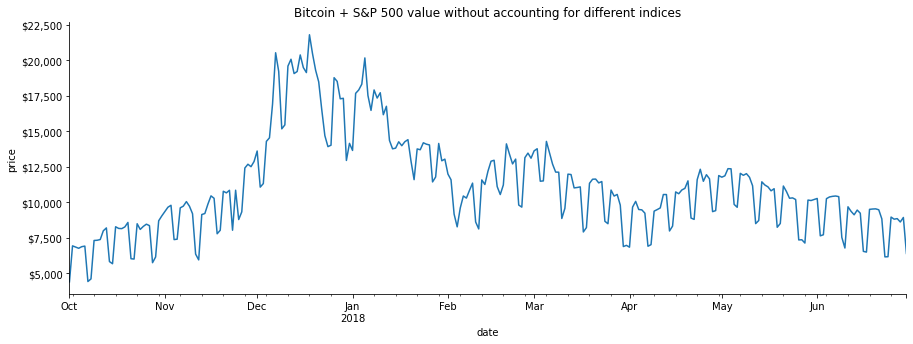

In [36]:
ax = portfolio['2017-Q4':'2018-Q2'].plot(y='close',figsize=(15,5),legend=False,title='Bitcoin + S&P 500 value without accounting for different indices')
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top','right']:
  ax.spines[spine].set_visible(False)

plt.show()

In [37]:
sp.reindex(bitcoin.index,method='ffill').head(10).assign(day_of_week = lambda x:x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [43]:
sp_reindexed = sp.reindex(bitcoin.index).assign(
    volume = lambda x:x.volume.fillna(0),
    close = lambda x:x.close.fillna(method='ffill'),
    open = lambda x:np.where(x.open.isnull(),x.close,x.open),
    high = lambda x:np.where(x.high.isnull(),x.close,x.high),
    low = lambda x:np.where(x.low.isnull(),x.close,x.low)
)

In [44]:
sp_reindexed.head(10).assign(
    day_of_week = lambda x:x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [45]:
fixed_portfolio =sp_reindexed + bitcoin

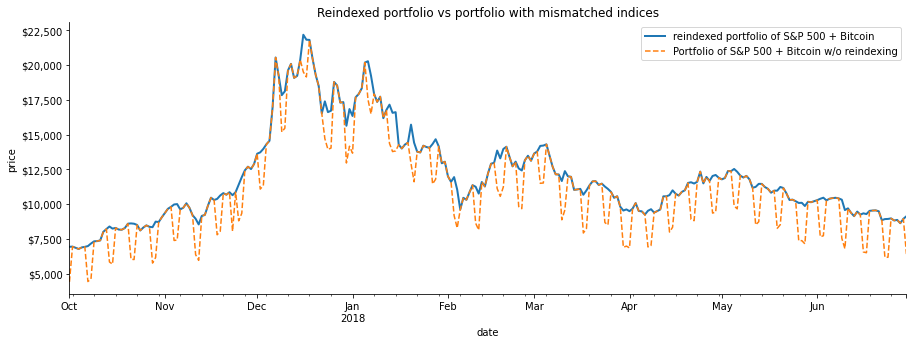

In [51]:
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(y='close',figsize=(15,5),linewidth=2,label='reindexed portfolio of S&P 500 + Bitcoin',
                                               title='Reindexed portfolio vs portfolio with mismatched indices')
portfolio['2017-Q4':'2018-Q2'].plot(y='close',ax=ax,linestyle='--',label='Portfolio of S&P 500 + Bitcoin w/o reindexing')
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top','right']:
  ax.spines[spine].set_visible(False)

plt.show()